In [1]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
# Select 2 prime numbers 
p = 19
q = 13

In [3]:
# First public key
n = p * q
n

247

In [4]:
def gcd(a, b):
 
    if (a == 0):
        return b
    return gcd(b % a, a)

In [5]:
def phi(n):
 
    result = 1
    for i in range(2, n):
        if (gcd(i, n) == 1):
            result+=1
    return result

In [6]:
# Calculating Phi(n)
phi_n = phi(n)
phi_n

216

In [7]:
# e = random.randint(0, phi_n)
e = 5

In [8]:
pulbic_key  = (n, e)

In [9]:
# k = random.randint(1, 10)
k = 4

In [10]:
d = (k * phi_n + 1) / (e)
d

173.0

In [11]:
private_key = d

In [12]:
image = cv2.imread('RSA.jpg', 0)
image.shape

(419, 575)

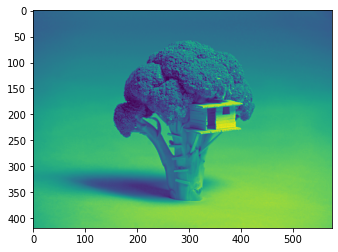

In [13]:
plt.imshow(image)
 
# display that image
plt.show()
def encrypt(input, e = 5, n = 247):
    cipher = pow(input, e) % n
    return cipher

In [14]:
shape = image.shape

In [15]:
image

array([[ 72,  71,  73, ...,  65,  64,  64],
       [ 72,  72,  73, ...,  64,  64,  65],
       [ 73,  72,  71, ...,  64,  64,  64],
       ...,
       [140, 141, 142, ..., 179, 178, 179],
       [140, 141, 142, ..., 179, 178, 179],
       [142, 142, 142, ..., 178, 178, 178]], dtype=uint8)

In [25]:
pixels = image.flatten()
enc = []

for pixel in pixels:
    enc.append(encrypt(int(pixel)))

enc = np.array(enc)

encrypted_image = enc.reshape(shape)

In [26]:
encrypted_image

array([[154,  67,  99, ..., 221, 220, 220],
       [154, 154,  99, ..., 220, 220, 221],
       [ 99, 154,  67, ..., 220, 220, 220],
       ...,
       [ 30, 202, 168, ...,  69,  68,  69],
       [ 30, 202, 168, ...,  69,  68,  69],
       [168, 168, 168, ...,  68,  68,  68]])

In [27]:
cv2.imwrite('rsa_encryption.jpg', encrypted_image)

True

In [28]:
def decryption(encrypted, d=173, n=247):
    return pow(encrypted, int(d)) % n
    

In [29]:
image2 = cv2.imread('rsa_encryption.jpg', 0)
pixels_enc = encrypted_image.flatten()
image2

array([[152,  70,  98, ..., 220, 221, 220],
       [155, 150, 101, ..., 218, 220, 223],
       [ 98, 157,  67, ..., 223, 219, 219],
       ...,
       [ 30, 201, 167, ...,  69,  69,  69],
       [ 29, 202, 170, ...,  68,  68,  68],
       [170, 168, 166, ...,  68,  68,  68]], dtype=uint8)

In [30]:

og = []

for pixel in pixels_enc:
    og.append(decryption(int(pixel)))

og = np.array(og)

original_image = og.reshape(shape)
original_image

array([[ 72,  71,  73, ...,  65,  64,  64],
       [ 72,  72,  73, ...,  64,  64,  65],
       [ 73,  72,  71, ...,  64,  64,  64],
       ...,
       [140, 141, 142, ..., 179, 178, 179],
       [140, 141, 142, ..., 179, 178, 179],
       [142, 142, 142, ..., 178, 178, 178]])

In [31]:
cv2.imwrite('decrypted.jpg', original_image)

True

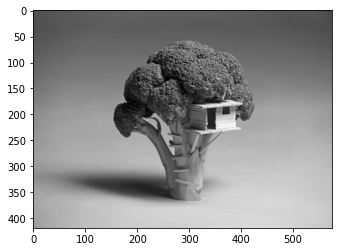

In [32]:
plt.imshow(original_image, cmap='gray')
# display that image
plt.show()